In [158]:
# %%Ren_2022 論文: 備註: 0128禮拜四開會忘記將一筆 捐款金額為0的人刪除
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False # 顯示負號
import plotly.graph_objects as go

## preprocessing from scikitlearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Machine Learning from scikitlearn
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

## others
from datetime import datetime as dt
import datetime
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from IPython.display import display
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import yellowbrick

# 學期分數->9X

# 個人筆記(Notion)
https://www.notion.so/bbacc6c6d551419298a8898a05b92032

# Data Path

In [159]:
data_path = "./new_data.csv"
pic_path = "./期末報告_主題(問題)說明截圖.png"

def png_func(pic_path):
    """讀取圖片"""
    lena = mpimg.imread(pic_path)
    # 此時 lena 就已經是一個 np.array 了，可以對它進行任意處理
    lena.shape #(512, 512, 3)
    plt.imshow(lena) # 顯示圖片
    plt.axis('off') # 不顯示座標軸
    plt.figure(figsize=(40,10))
    plt.show()


In [160]:
df = pd.read_csv(data_path)
df=df.reset_index() # 怕有陷阱，先處理一下idx
df=df.iloc[:, 1:len(df.columns)]
df['date'] = df['Order Date']
df['date2'] = df['Ship Date']
df['order_date'] = pd.to_datetime(df.date.apply(lambda x: str(x)[:10] ))
df['ship_date'] = pd.to_datetime(df.date2.apply(lambda x: str(x)[:10] ))


In [161]:
df = df[['Row ID', 'Order ID','order_date', 'ship_date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',]]

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Task Introduction
---
- 資料
    * 先找資料來源，不是要抄而是要看這資料怎來的，可以的話甚至去了解key資料的方式（EX:選填還是自己填寫，自己填就可能比較容易出問題）
    * 任何參考資料來源都要有連結，不過在關於python畫圖的部分，我自己對於一些圖表製作方式已經有一定的掌握程度（可以自己刻），
---
- EDA
    - Check 1.
        * 欄位數
        * 筆數
        * 各欄位value counts數
        * 遺失值數量
        * Name跟CustomerID數量檢查
        * 重複欄位檢查
        



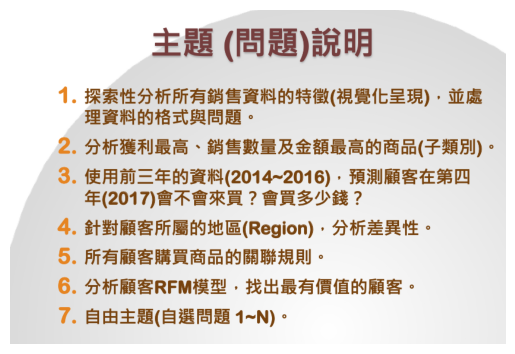

<Figure size 4000x1000 with 0 Axes>

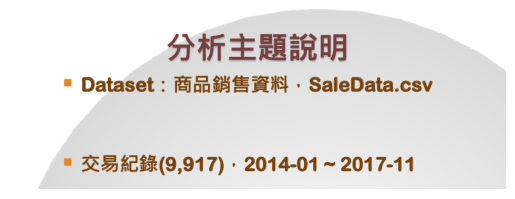

<Figure size 4000x1000 with 0 Axes>

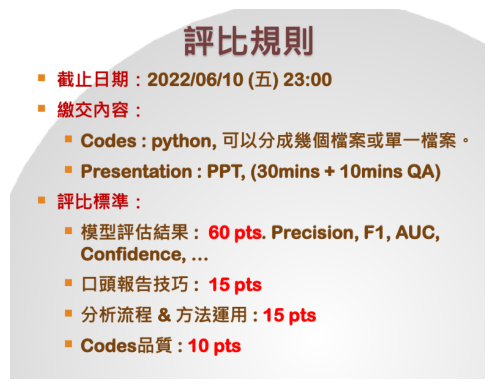

<Figure size 4000x1000 with 0 Axes>

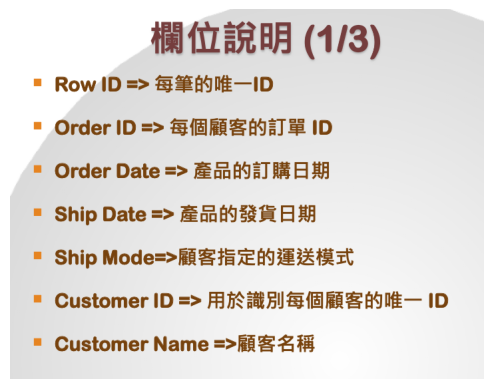

<Figure size 4000x1000 with 0 Axes>

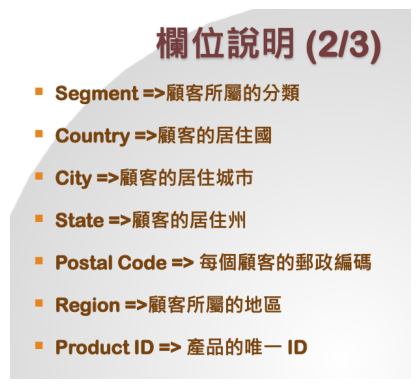

<Figure size 4000x1000 with 0 Axes>

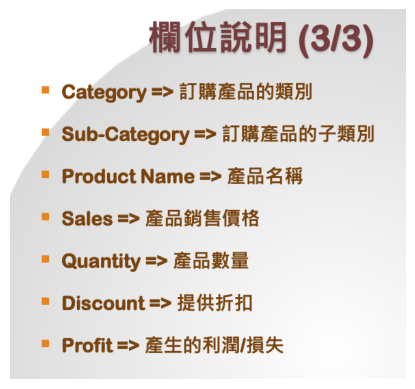

<Figure size 4000x1000 with 0 Axes>

In [163]:
# Elearning 說明: https://elearning.nkust.edu.tw/learn/index.php
png_func(pic_path)
png_func('./主題說明.png')
png_func('./評比規則.png')
png_func('./欄位說明1.png')
png_func('./欄位說明2.png')
png_func('./欄位說明3.png')

# About this data

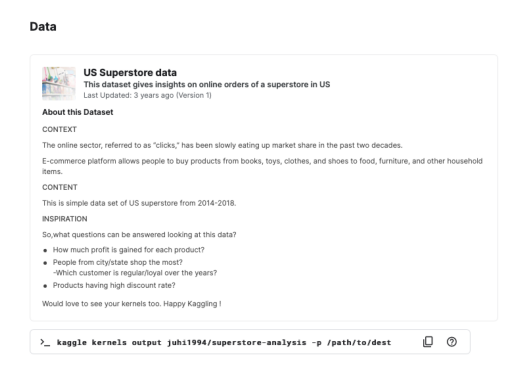

<Figure size 4000x1000 with 0 Axes>

In [164]:
png_func("./data_introduction.png")

## CONTEXT
# The online sector, referred to as “clicks,” has been slowly eating up market share in the past two decades.
# E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.


## CONTENT
# This is simple data set of US superstore from 2014-2018.


## INSPIRATION
# So,what questions can be answered looking at this data?
    # How much profit is gained for each product?
    # People from city/state shop the most?
    # -Which customer is regular/loyal over the years?
    
# Products having high discount rate?

# About this table, let us understand the attributes of this data set:
Source from JUHI BADIYANI, 不認識他但謝謝他
---
https://www.kaggle.com/code/juhi1994/superstore-analysis/data



# 'Row ID
- This is nothing but Serial No. 


# 'Order ID
- ID created when a product order is placed.


# 'Order Date
- Date on which a customer places his/her order.


# 'Ship Date
- Date on which the order is shipped.


# 'Ship Mode
- Mode of shipment of each order.


# 'Customer ID
- ID assigned to each customer who places an order.


# 'Customer Name
- Name of Customer.

# Segment 
- Section from where the order is placed.



# 'Country
- Country details of this data set. We are looking only for US store data.


# 'City
- Cities of US are listed here.


# 'State
- States of US are listed here.


# 'Postal Code
- pin code 


# 'Region
- grouped into region wise


# 'Product ID
- Product ID of each product


# 'Category
- Category to which each product belongs to.


# 'Sub-Category
- Sub-Category of each Category


# 'Product Name
- Name of products.


# 'Sales
- Selling Price of each product.


# 'Quantity
- number of quantity available for a particular product.


# 'Discount
- Discount available on each product.


# 'Profit
- Profit gained on each product.

# Read and Simple check data
* reading data
* describe it
* 檢查欄位數/筆數/空值/錯誤值/重複值/型態


In [165]:


def segmentLine():
    """分隔線"""
    print("-----"*15)
    return

def readAndCheckData(data):
    # read
    df = data.copy()
    
    
    
    print(f"剛讀取完: (筆數:{len(df)})_(欄位數:{len(df.columns)})")
    print(list(df.columns))
    
    
    
    segmentLine()
    print("#各欄位空值數量")
    display(df.isnull().sum().to_frame())
    
    segmentLine()
    print("#前五筆展示")
    display(df.head())
    
    segmentLine()
    print("#型態")
    display(df.info())
    
    segmentLine()
    print("#value_counts")
    # display(df.value_counts(list(df.columns())))
    
    
    return df



In [166]:
df = readAndCheckData(df)

剛讀取完: (筆數:9994)_(欄位數:21)
['Row ID', 'Order ID', 'order_date', 'ship_date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
---------------------------------------------------------------------------
#各欄位空值數量


,0
Row ID,0
Order ID,0
order_date,0
ship_date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


---------------------------------------------------------------------------
#前五筆展示


,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---------------------------------------------------------------------------
#型態
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object      

None

---------------------------------------------------------------------------
#value_counts


# 各個欄位 value 種類個數
* 比如說欄位state有49個，美國好像有50洲(忘記幾顆星星了),反正其他欄位類推
* 美國州名,city,文化等資料（from.. ）：
    * 感覺不安全但又很詳細：   http://114.xixik.com/usa-stats/
    * 維基百科:             https://zh.wikipedia.org/zh-tw/美國州份和領地列表
* 重要聲明&備註：所有連結如果裡面有病毒都不關我的事...

In [167]:

for each_col in list(df.columns):print(f"{each_col}數量: {len(df.value_counts([each_col]).to_frame())}")


Row ID數量: 9994
Order ID數量: 5009
order_date數量: 1237
ship_date數量: 1334
Ship Mode數量: 4
Customer ID數量: 793
Customer Name數量: 793
Segment數量: 3
Country數量: 1
City數量: 531
State數量: 49
Postal Code數量: 631
Region數量: 4
Product ID數量: 1862
Category數量: 3
Sub-Category數量: 17
Product Name數量: 1850
Sales數量: 5825
Quantity數量: 14
Discount數量: 12
Profit數量: 7287


# 每個欄位的每個"值"在資料集裡面出現幾次

In [168]:
for each_col in list(df.columns):
    # if each_col == "State" or each_col == "City" or each_col == "Region":
    #     print(f"{each_col}數量: {len(df.value_counts([each_col]).to_frame())}")
    display(df.value_counts([each_col]).to_frame())

,0
Row ID,
1,1
6666,1
6659,1
6660,1
6661,1
...,...
3333,1
3334,1
3335,1


,0
Order ID,
CA-2017-100111,14
CA-2017-157987,12
US-2016-108504,11
CA-2016-165330,11
CA-2016-105732,10
...,...
CA-2015-139738,1
CA-2017-113572,1
CA-2015-139374,1


,0
order_date,
2016-09-05,38
2017-09-02,36
2016-11-10,35
2017-12-02,34
2017-12-01,34
...,...
2016-02-29,1
2016-03-07,1
2016-03-30,1


,0
ship_date,
2015-12-16,35
2017-09-26,34
2017-12-06,32
2017-11-21,32
2017-12-12,30
...,...
2015-03-13,1
2015-03-15,1
2015-03-21,1


,0
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


,0
Customer ID,
WB-21850,37
PP-18955,34
JL-15835,34
MA-17560,34
SV-20365,32
...,...
AO-10810,1
JR-15700,1
CJ-11875,1


,0
Customer Name,
William Brown,37
Matt Abelman,34
John Lee,34
Paul Prost,34
Edward Hooks,32
...,...
Carl Jackson,1
Jocasta Rupert,1
Ricardo Emerson,1


,0
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


,0
Country,
United States,9994


,0
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Redwood City,1
Holyoke,1
Redding,1


,0
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


,0
Postal Code,
10035,263
10024,230
10009,229
94122,203
10011,193
...,...
61832,1
61821,1
61761,1


,0
Region,
West,3203
East,2848
Central,2323
South,1620


,0
Product ID,
OFF-PA-10001970,19
TEC-AC-10003832,18
FUR-FU-10004270,16
TEC-AC-10003628,15
FUR-CH-10002647,15
...,...
TEC-PH-10002645,1
OFF-AP-10000326,1
FUR-TA-10001691,1


,0
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


,0
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


,0
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1922,1
4009 Highlighters,1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection,1


,0
Sales,
12.960,56
19.440,39
15.552,39
25.920,36
10.368,36
...,...
62.296,1
62.352,1
62.376,1


,0
Quantity,
3,2409
2,2402
5,1230
4,1191
1,899
7,606
6,572
9,258
8,257


,0
Discount,
0.00,4798
0.20,3657
0.70,418
0.80,300
0.30,227
0.40,206
0.60,138
0.10,94
0.50,66


,0
Profit,
0.0000,65
6.2208,43
9.3312,38
5.4432,32
3.6288,32
...,...
3.8136,1
3.8073,1
3.8024,1


In [169]:
df

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# 欄位轉換：名字&型態

In [170]:


## 新的欄位名： 去掉空白
new_col_name = ['Row_ID', 
                'Order_ID','Order_Date', 
                'Ship_Date','Ship_Mode',
                'Customer_ID','Customer_Name', 
                'Segment', 
                'Country','City','State','Postal_Code','Region', 
                'Product_ID','Category','Sub_Category','Product_Name',
                'Sales','Quantity', 'Discount','Profit'
                ]





In [171]:
len(df.columns)

21

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# 整理好後的程式碼放到下面這欄
* 欄位名轉換有問題，先不急著轉，有空再確認一下

In [173]:
## 欄位名轉換
# df.columns=[new_col_name] # 這邊轉換有問題,別急著轉好了

## type change


In [174]:

# def changeCol(df,):
#     """換欄位名字&Type"""

## 欄位名轉換
# df.columns=

## info & type
display(df.info())



# print(len(df.columns))


## 型態轉換    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

None

In [175]:
df

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [176]:
df.loc[0]

Row ID                                           1
Order ID                            CA-2016-152156
order_date                     2016-11-08 00:00:00
ship_date                      2016-11-11 00:00:00
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                  42420
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                       

In [177]:
df

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# 發現

In [178]:


"""

Order ID:       CA-2016-152156
Customer ID:    CG-12520        ## 名字簡寫＋
Customer Name   Claire Gute


"""

'\n\nOrder ID:       CA-2016-152156\nCustomer ID:    CG-12520        ## 名字簡寫＋\nCustomer Name   Claire Gute\n\n\n'

In [179]:
test_cus1 = df[df['Customer Name']=="Claire Gute"]
test_cus1[["order_date"]]

,order_date
0,2016-11-08
1,2016-11-08
5491,2017-01-26
6877,2015-10-15
6878,2015-10-15


In [180]:
for i in list(df.columns):
    
    ## 欄位名
    print(i)
    segmentLine()
    
    
    copy_test_cus1 = test_cus1.copy()
    print(copy_test_cus1.value_counts(i))
    
    
    # test_cus1

Row ID
---------------------------------------------------------------------------
Row ID
1       1
2       1
5492    1
6878    1
6879    1
dtype: int64
Order ID
---------------------------------------------------------------------------
Order ID
CA-2016-152156    2
US-2015-123918    2
CA-2017-164098    1
dtype: int64
order_date
---------------------------------------------------------------------------
order_date
2015-10-15    2
2016-11-08    2
2017-01-26    1
dtype: int64
ship_date
---------------------------------------------------------------------------
ship_date
2015-10-15    2
2016-11-11    2
2017-01-27    1
dtype: int64
Ship Mode
---------------------------------------------------------------------------
Ship Mode
Same Day        2
Second Class    2
First Class     1
dtype: int64
Customer ID
---------------------------------------------------------------------------
Customer ID
CG-12520    5
dtype: int64
Customer Name
------------------------------------------------------------

In [181]:
(df.loc[0])

Row ID                                           1
Order ID                            CA-2016-152156
order_date                     2016-11-08 00:00:00
ship_date                      2016-11-11 00:00:00
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                  42420
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                       

In [182]:
# features = ["YearBuilt", "MoSold", "ScreenPorch"]
# sns.relplot(
#     x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
# );

# Feature 工程

* Sales越高Profit有上有下
* Quantity越高Profit穩定，可能代表不影響吧
* Discount越高似乎Profit有在變低

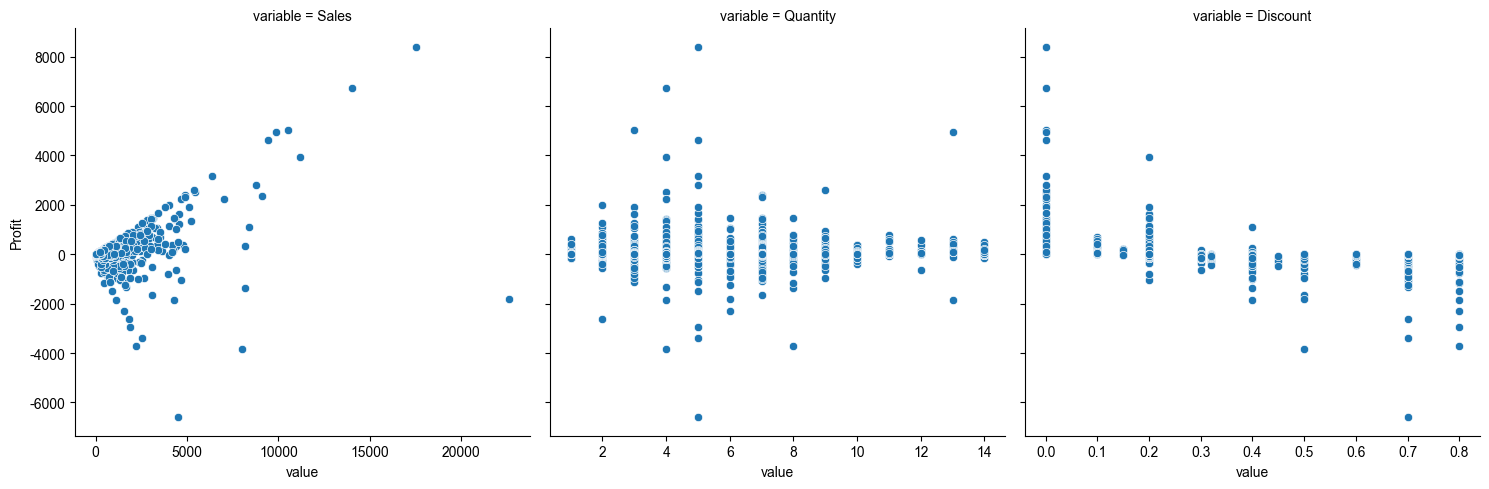

In [183]:
features = ["Sales", "Quantity", "Discount"]
sns.relplot(
    x="value", y="Profit", col="variable", data=df.melt(id_vars="Profit", value_vars=features), facet_kws=dict(sharex=False),
);
plt.show()

# 某類別底下的其他數值對(x)某數值(Y)


In [203]:
def catVsProfit(col_x,col_y,df_input ):
    sns.catplot(x=col_x, y=col_y, data=df_input, kind="boxen",);
    plt.style.use('ggplot')
    plt.title(col_x+" vs "+col_y)
    plt.show()
    return





feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);


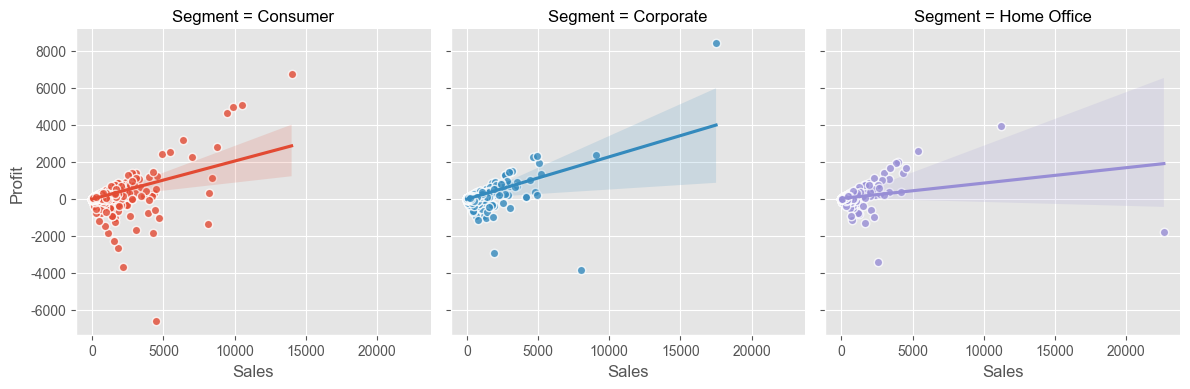

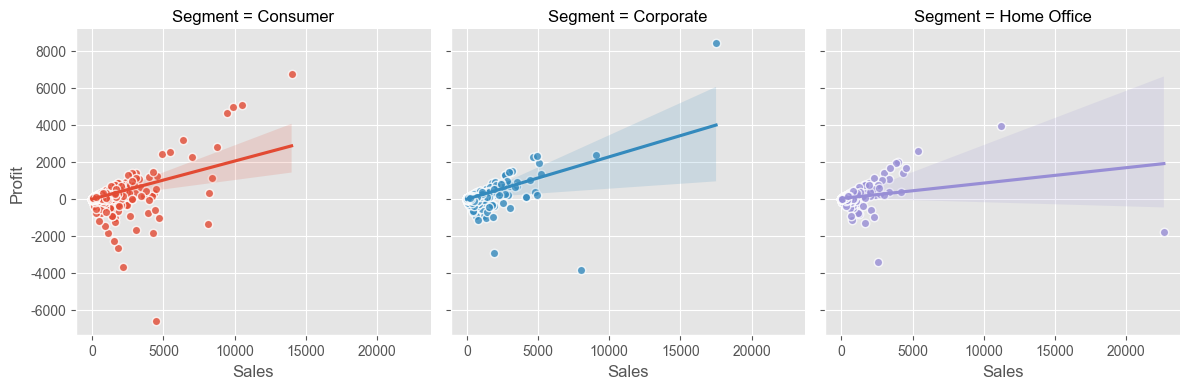

In [206]:
def scatterKwCategory(input_x,input_y,input_cat,input_df):
    sns.lmplot(
    x=input_x, y=input_y, hue=input_cat, col=input_cat,
    data=input_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);
    plt.show()
    return
    
copy_df = df.copy()
scatterKwCategory("Sales","Profit","Segment",copy_df)
    

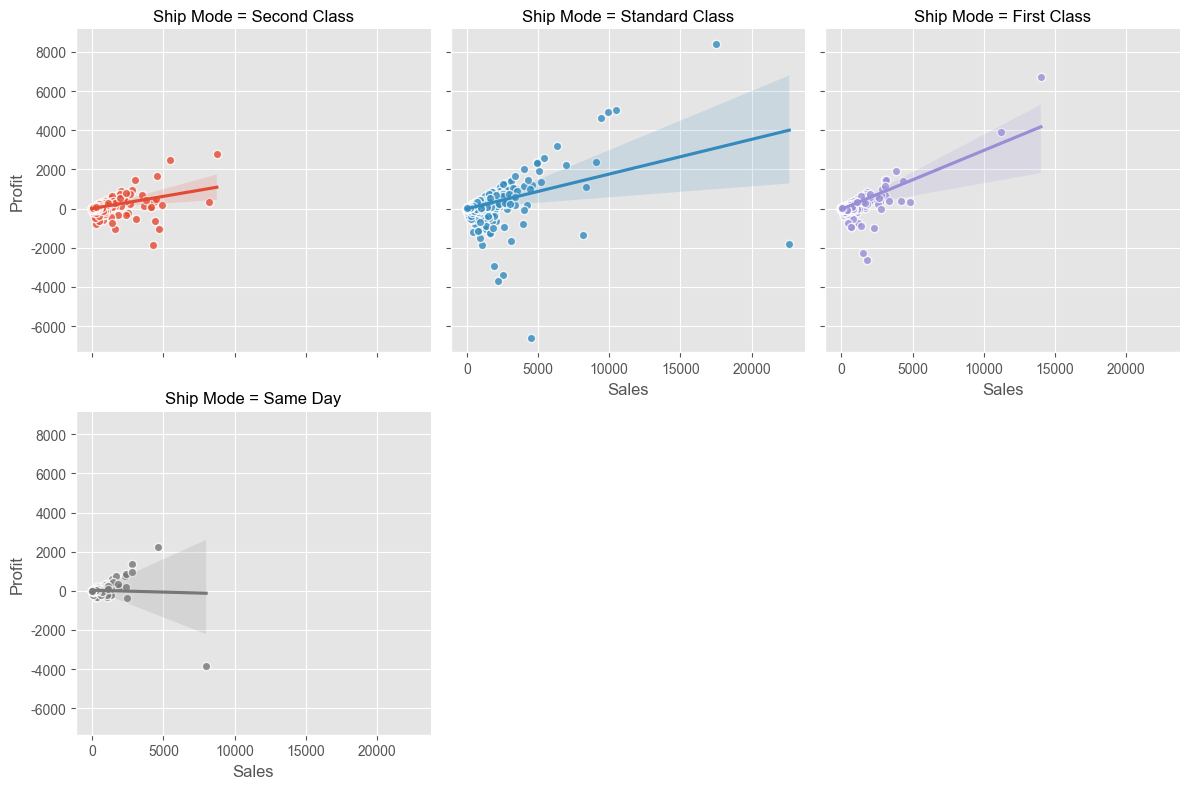

In [207]:
copy_df = df.copy()
scatterKwCategory("Sales","Profit","Ship Mode",copy_df)

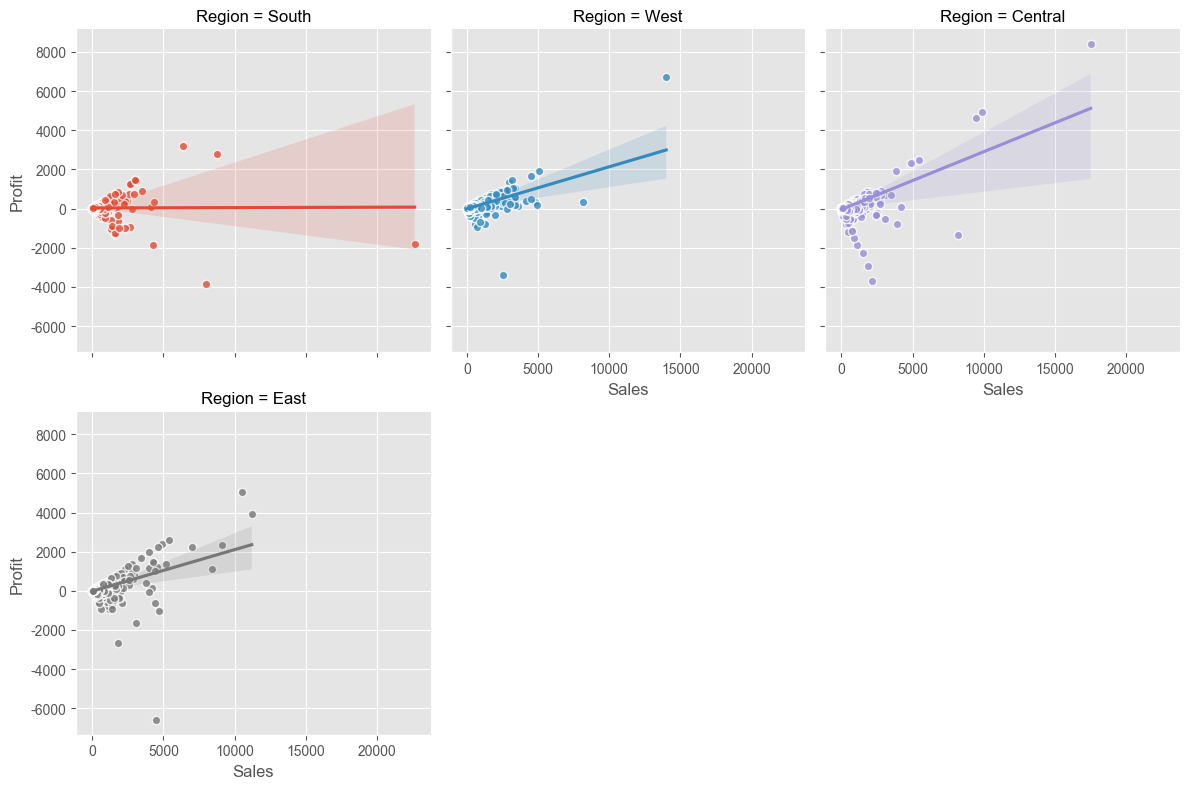

In [238]:
copy_df = df.copy()
scatterKwCategory("Sales","Profit","Region",copy_df)

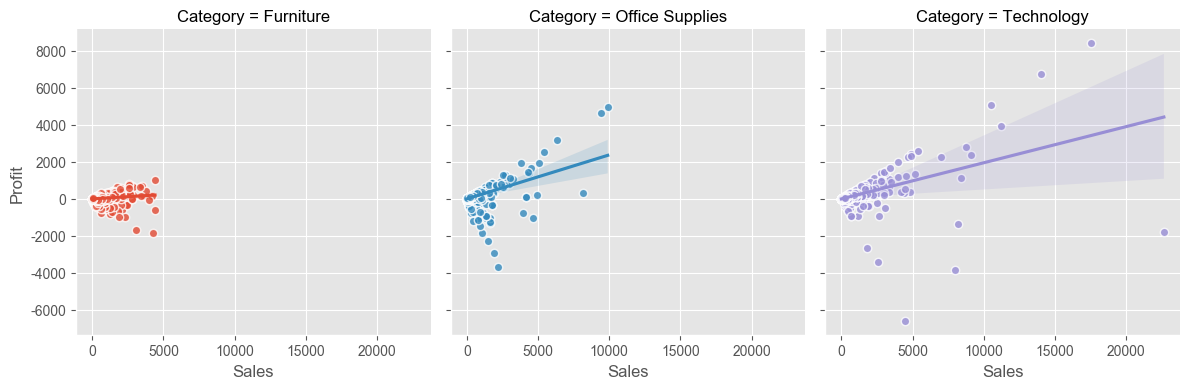

In [239]:
copy_df = df.copy()
scatterKwCategory("Sales","Profit","Category",copy_df)

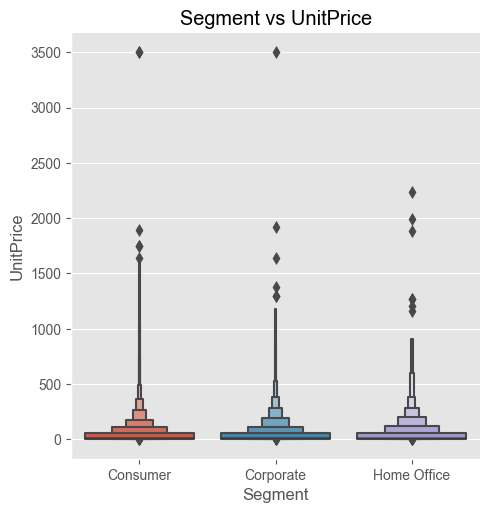

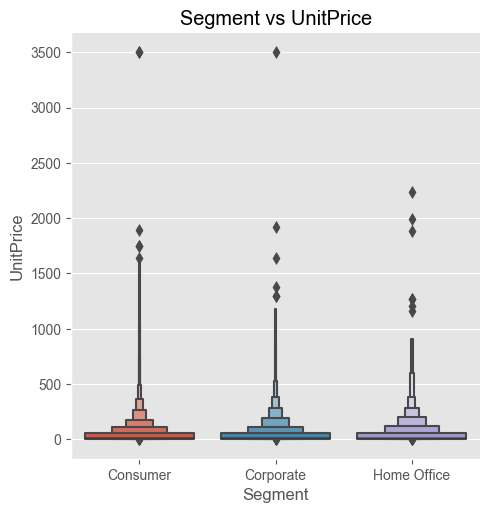

In [204]:
catvsprofit_data = df.copy()

catVsProfit("Segment", "UnitPrice",catvsprofit_data)
catVsProfit("Segment", "UnitPrice",catvsprofit_data)

In [186]:
# # YOUR CODE HERE: 
# feature = "Segment"

# sns.lmplot(
#     x=feature, y="Profit", hue="BldgType", col="BldgType",
#     data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
# );

* Segment 金額比較

In [187]:
df["count"]=1
def comparePlot(plot_x,plot_target):
    """某一欄位與其他數值欄位比較"""
    plot_x = plot_x.groupby([plot_target])[["Sales", "Quantity", "Discount","Profit","count"]].sum()
    plot_x = plot_x[['Sales','Quantity',"Discount","Profit"]]/plot_x[['count']].values
    ax = plot_x.plot(kind="bar", figsize=(12,8))
    plt.style.use("ggplot")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(plot_target+"_compare")
    plt.show()

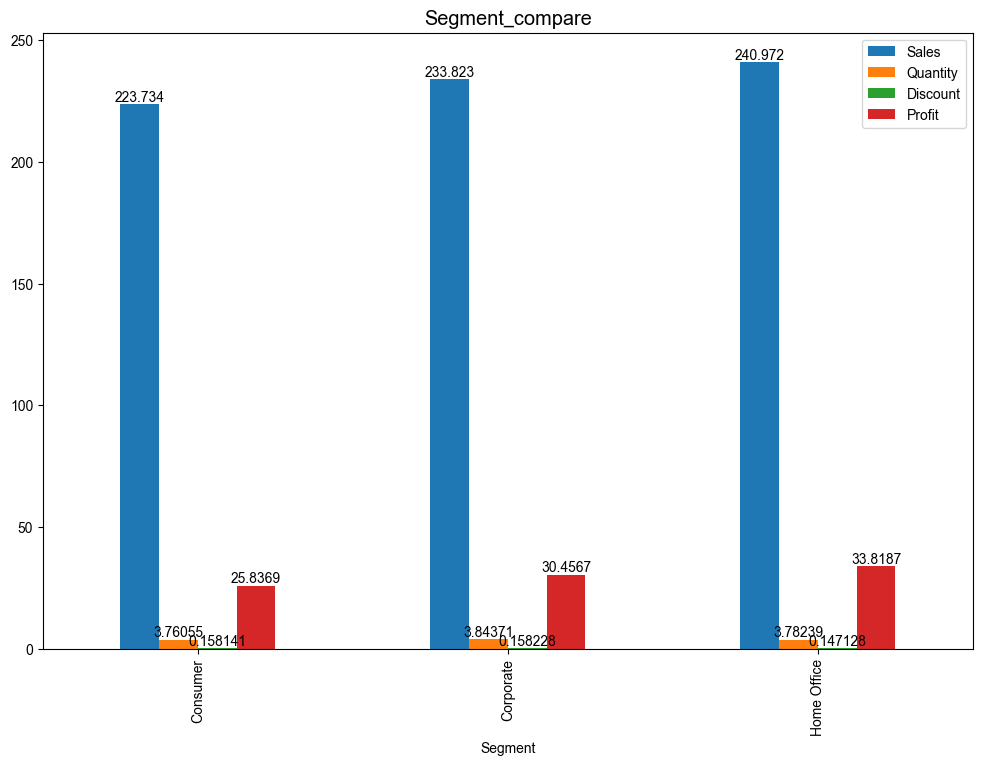

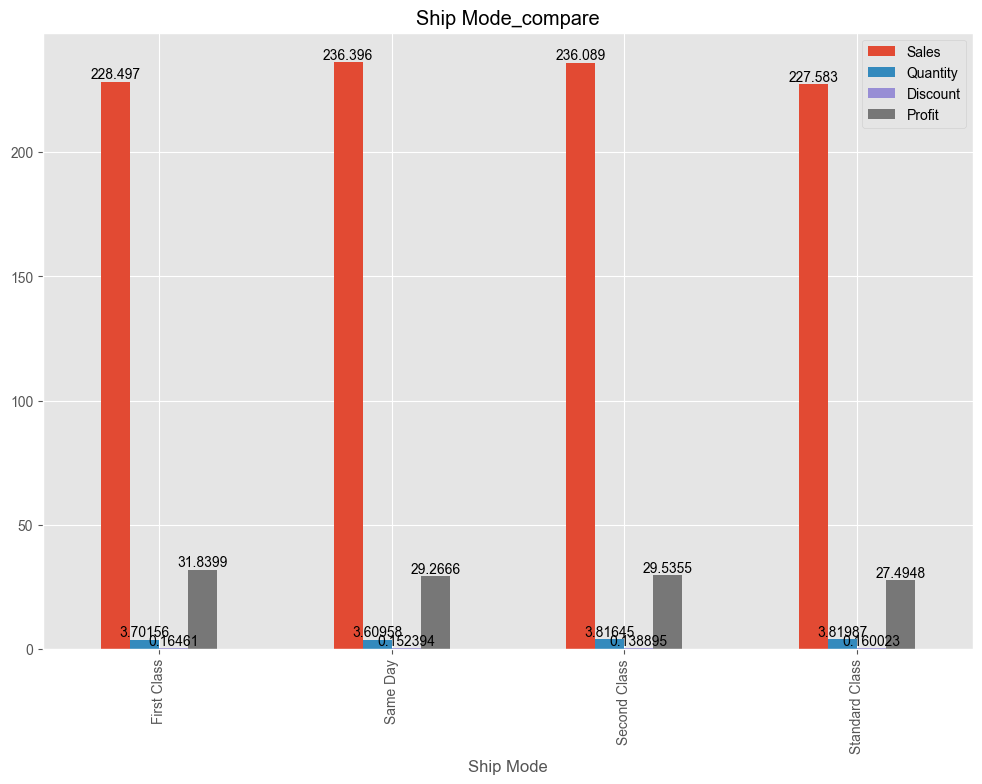

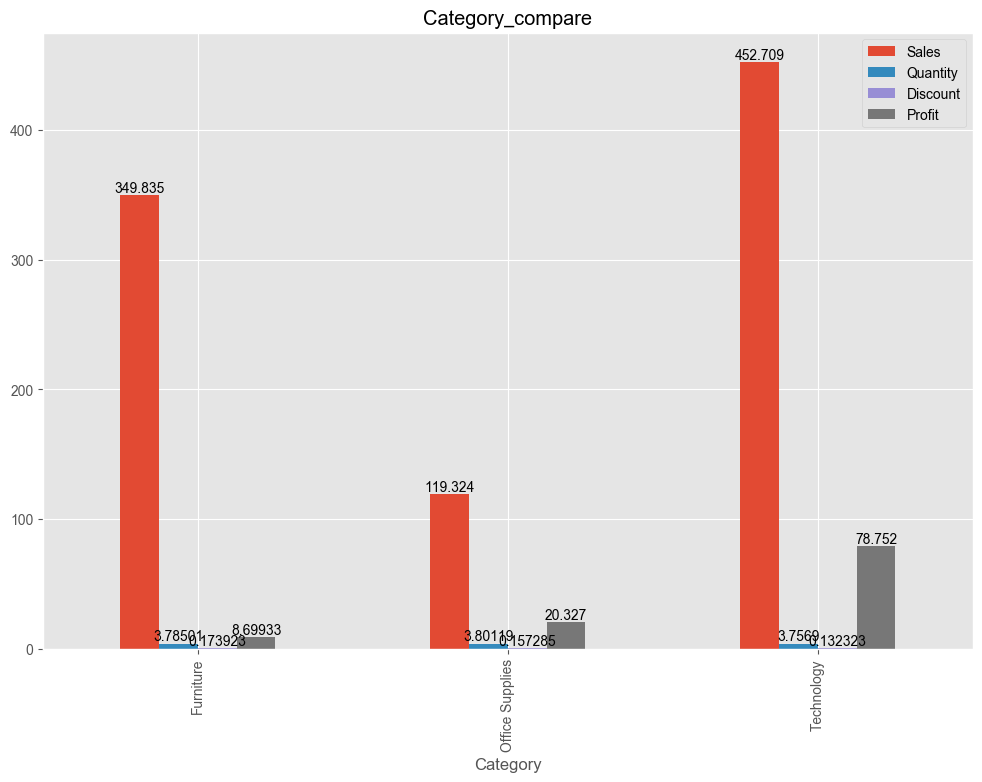

In [188]:


plot_x = df.copy()
plot_target = "Segment"
comparePlot(plot_x, plot_target)

plot_target = "Ship Mode"
comparePlot(plot_x, plot_target)

plot_target = "Category"
comparePlot(plot_x, plot_target)

* Sales,qty,discount, -> Profit

# 折扣要用1扣

- 單價*數量*(1-折扣)=Sales
- 單價=Sales/(數量*(1-折扣))

* Sales =   營業額
* Quantity= 銷售數量
* Discount= 折扣(用1減掉才是)
單價 = Sales/qty

# 單價&成本

In [193]:
df['UnitPrice'] = round((round(df['Sales'],2))/ df['Quantity']*(1-df['Discount']),2)
df['cost'] = abs(df['Profit']/df['Quantity'])-(df['UnitPrice'])

# 看有無算錯
check_pro_unitprice = df.copy()
check_pro_unitprice=check_pro_unitprice[['Segment','ship_date','Ship Mode','Product Name','Sales','Quantity','Discount','UnitPrice','cost']]

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,count,UnitPrice,cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,130.98,-110.0232
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,243.98,-170.7860
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1,7.31,-3.8743
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1,105.33,-28.7238
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1,8.95,-7.6918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,6.73,-5.3624
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,1,45.98,-38.1634
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,1,103.43,-93.7334
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,1,7.40,-4.0700


* 新增訂購～shipdate差幾天,
* RFM

# RFM

In [209]:
len(set(df['Customer ID']))

793

In [222]:
df2017 = df[df['order_date']>="2017"]
len(set(df2017['Customer ID']))

693

In [215]:
(693/793)

0.8738965952080706

In [219]:
df_before2017 = df[df['order_date']<"2017"]
len(set(df_before2017['Customer ID']))

782

In [228]:

list1 = list(set(df_before2017['Customer ID']))
list2 = list(set(df2017['Customer ID']))
count = 0
for i in list1:
    if i in list2:
        count+=1
        
print(f"2017年之前的人數: {len(set(list1))}")
print(f"# 16前的人在17年也有買的人數:   {count}")

print("# 16前的人在17年也有買的人數百分比: ",count/len(set(df_before2017['Customer ID'])))

2017年之前的人數: 782
# 16前的人在17年也有買的人數:   682
# 16前的人在17年也有買的人數百分比:  0.8721227621483376


In [230]:
test_targetcol = df.copy()


## 2017有沒有買的欄位建立(0,1)
target_2017 = []


for i in list(set(test_targetcol['Customer ID'])):
    if i in list2:
        target_2017.append(1)
        continue
    target_2017.append(0)
    
print(len(target_2017))
    

793


In [235]:
target_2017

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


In [237]:
df['target_2017'] = np.array(target_2017)
df

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,count,UnitPrice,cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,130.98,-110.0232
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,243.98,-170.7860
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1,7.31,-3.8743
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1,105.33,-28.7238
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1,8.95,-7.6918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,6.73,-5.3624
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,1,45.98,-38.1634
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,1,103.43,-93.7334
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,1,7.40,-4.0700


# RandomForestClassifier

In [240]:
from sklearn.ensemble import RandomForestClassifier
